In [1]:
# ASSIGNMENT=TIMESERIES

In [2]:
!pip install pandas numpy matplotlib statsmodels scikit-learn


In [10]:
# import important libraries

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")


In [4]:
# Data Loading
data = pd.read_csv('exchange_rate.csv', parse_dates=['date'], index_col='date')
data



,Ex_rate
date,
01-01-1990 00:00,0.785500
02-01-1990 00:00,0.781800
03-01-1990 00:00,0.786700
04-01-1990 00:00,0.786000
05-01-1990 00:00,0.784900
...,...
06-10-2010 00:00,0.718494
07-10-2010 00:00,0.721839
08-10-2010 00:00,0.723197


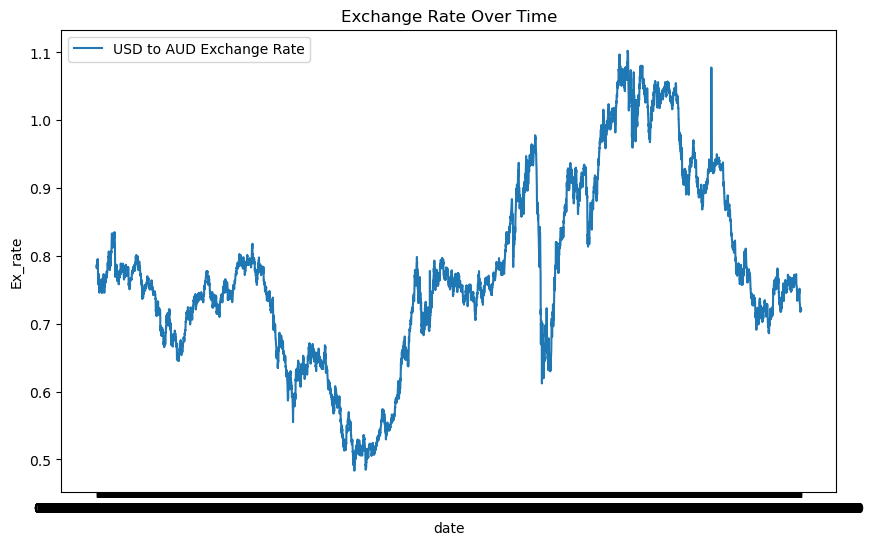

In [5]:
# 2. Initial Exploration
plt.figure(figsize=(10, 6))
plt.plot(data, label='USD to AUD Exchange Rate')
plt.title('Exchange Rate Over Time')
plt.xlabel('date')
plt.ylabel('Ex_rate')
plt.legend()
plt.show()


In [6]:
#3. Check for Missing Values
print("Missing values:\n", data.isnull().sum())





Missing values:
 Ex_rate    0
dtype: int64


# Part 2: ARIMA Model Building

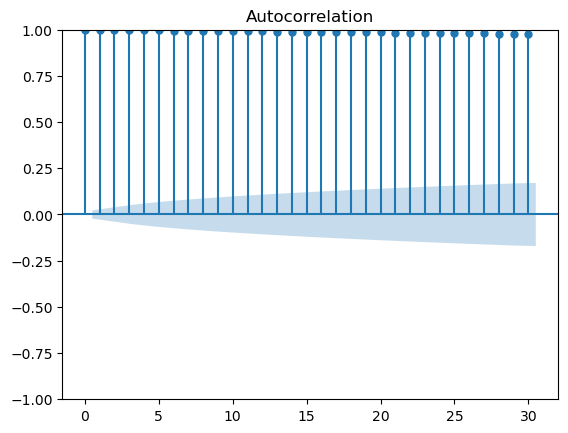

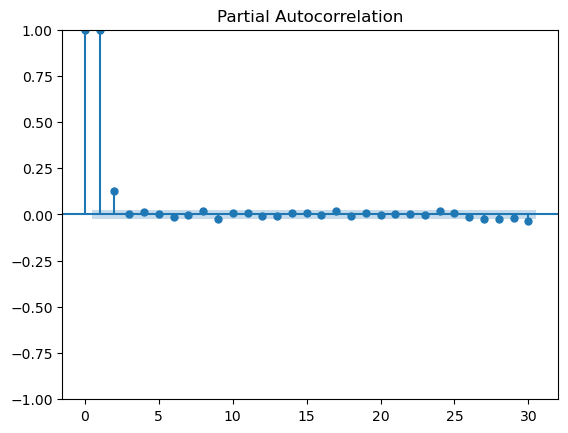

In [7]:
# 1. Determine initial ARIMA parameters using ACF and PACF plots
plot_acf(data, lags=30)
plot_pacf(data, lags=30)
plt.show()


In [8]:
# 2. Fit the ARIMA model
p, d, q = 1, 1, 1  # Example parameters; adjust based on ACF/PACF
arima_model = ARIMA(data, order=(p, d, q))
arima_fit = arima_model.fit()



In [9]:
arima_fit

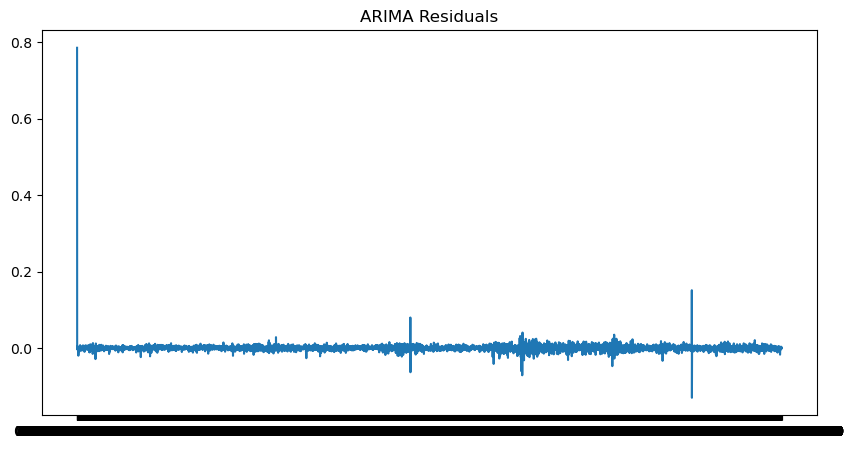

In [10]:
# 3. Residual diagnostics
residuals = arima_fit.resid
plt.figure(figsize=(10, 5))
plt.plot(residuals)
plt.title("ARIMA Residuals")
plt.show()

In [11]:
# 4. Forecast with ARIMA
forecast_arima = arima_fit.get_forecast(steps=30)  # Adjust forecast horizon as needed
arima_pred = forecast_arima.predicted_mean
arima_conf_int = forecast_arima.conf_int()


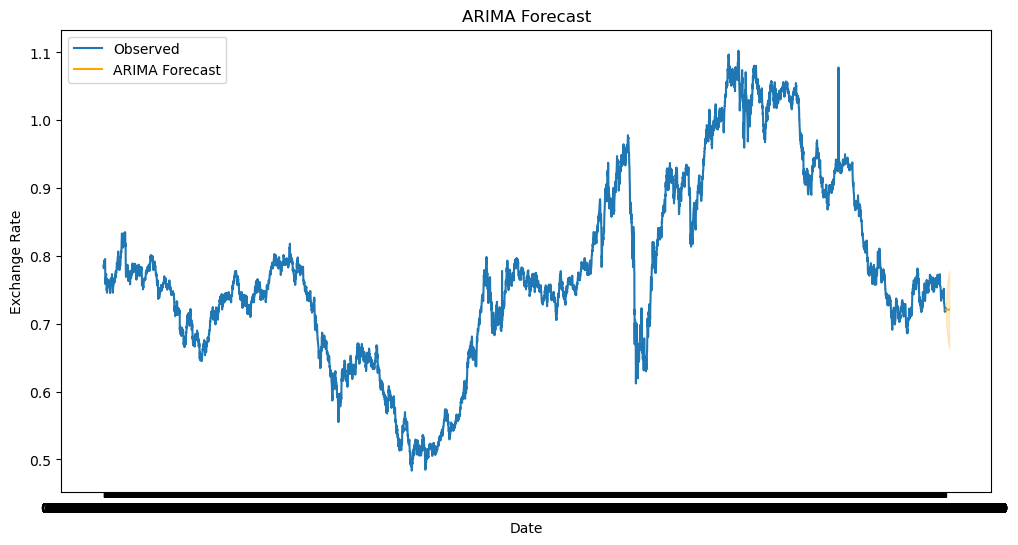

In [12]:
# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(data, label="Observed")
plt.plot(arima_pred, label="ARIMA Forecast", color="orange")
plt.fill_between(arima_conf_int.index, arima_conf_int.iloc[:, 0], arima_conf_int.iloc[:, 1], color='orange', alpha=0.2)
plt.title("ARIMA Forecast")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.legend()
plt.show()

In [ ]:
# Part 3: Exponential Smoothing Model Building


In [13]:
exp_model = ExponentialSmoothing(data, trend="add", seasonal=None).fit()
exp_model



In [14]:
# 2. Forecast with Exponential Smoothing
exp_forecast = exp_model.forecast(steps=30)  # Adjust forecast horizon as needed



In [ ]:
# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(data, label="Observed")
plt.plot(exp_forecast, label="Exponential Smoothing Forecast", color="green")
plt.title("Exponential Smoothing Forecast")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.legend()
plt.show()


In [ ]:
test_data = data[-30:]  

In [ ]:
# Calculate error metrics
arima_mae = mean_absolute_error(test_data, arima_pred[:30])
arima_rmse = sqrt(mean_squared_error(test_data, arima_pred[:30]))


In [ ]:
exp_mae = mean_absolute_error(test_data, exp_forecast)
exp_rmse = sqrt(mean_squared_error(test_data, exp_forecast))


In [ ]:
# Print metrics
print(f"ARIMA MAE: {arima_mae}, RMSE: {arima_rmse}")
print(f"Exponential Smoothing MAE: {exp_mae}, RMSE: {exp_rmse}")

# Summary of results
if arima_mae < exp_mae:
    print("ARIMA model performed better based on MAE.")
else:
    print("Exponential Smoothing model performed better based on MAE.")

if arima_rmse < exp_rmse:
    print("ARIMA model performed better based on RMSE.")
else:
    print("Exponential Smoothing model performed better based on RMSE.")